<a href="https://colab.research.google.com/github/chu-ise/378A-2022/blob/main/notebooks/02/01_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Environment setup to persist data in Google Drive

In [1]:
import os, sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount("/content/drive")
    !ln -s "/content/drive/My Drive/colab_workspace" workspace
    WORKSPACE_DIR = "/content/workspace"
else:
    WORKSPACE_DIR = "../workspace" 
print(f'WORKSPACE_DIR = {WORKSPACE_DIR}')
data_dir = os.path.join(WORKSPACE_DIR, "data")
os.makedirs(data_dir, exist_ok=True)

Mounted at /content/drive
WORKSPACE_DIR = /content/workspace


In [2]:
%%capture
%pip install gdown numpy pandas matplotlib

# 01. Python Basics for Text

In [3]:
# set random seed
import numpy as np
np.random.seed(4)

In [4]:
import gdown
import os
id = "1uDxxBNZ-qZscPjdEam0QEjTdKcFUBMuy"

data_file = "bok_minutes.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1uDxxBNZ-qZscPjdEam0QEjTdKcFUBMuy
To: /content/bok_minutes.csv
100%|██████████| 10.1M/10.1M [00:00<00:00, 43.0MB/s]


'bok_minutes.csv'

In [5]:
import pandas as pd
df = pd.read_csv(data_file)
df.head()

,id,filename,mdate,rdate,section,text
0,BOK_20181130_20181218_S1,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Economic Situation,일부 위원은 관련부서에서 지난 3/4분기 중 유로지역 경제성장 부진을 자동차 관련 ...
1,BOK_20181130_20181218_S2,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Foreign Currency,일부 위원은 그동안 글로벌펀드와 패시브펀드의 규모가 크게 확대되어 우리나라 자본유출...
2,BOK_20181130_20181218_S3,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Financial Markets,"일부 위원은 현재 대기업들이 전반적으로는 문제가 없지만, 건설 조선업 등에 속하는 ..."
3,BOK_20181130_20181218_S4,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Monetary Policy,일부 위원은 최근 경기상황과 금융불균형 등을 고려할 때 확장적 재정정책의 필요성에는...
4,BOK_20181130_20181218_S5,BOK_20181130_20181218,2018-11-30 10:00:00,2018-12-18 16:00:00,Participants’ Views,일부 위원은 최근 실물경제 성장경로의 하방위험이 다소 커진 것으로 보이고 물가도 상...


In [6]:
df.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        978 non-null    object
 1   filename  978 non-null    object
 2   mdate     978 non-null    object
 3   rdate     978 non-null    object
 4   section   978 non-null    object
 5   text      848 non-null    object
dtypes: object(6)
memory usage: 46.0+ KB


In [7]:
# drop missing
df = df.dropna()

In [8]:
# Number of label categories (e.g. section)
df['section'].describe()

count                  848
unique                   6
top       Foreign Currency
freq                   163
Name: section, dtype: object

In [9]:
df['section'] = df['section'].str.upper()

In [10]:
df['section'].value_counts()

FOREIGN CURRENCY       163
MONETARY POLICY        163
PARTICIPANTS’ VIEWS    163
ECONOMIC SITUATION     162
FINANCIAL MARKETS      149
GOVERNMENT’S VIEW       48
Name: section, dtype: int64

In [11]:
# keep all sections through FINANCIAL MARKETS
keep_sections = df['section'].value_counts().index[:5]
print(keep_sections)

Index(['FOREIGN CURRENCY', 'MONETARY POLICY', 'PARTICIPANTS’ VIEWS',
       'ECONOMIC SITUATION', 'FINANCIAL MARKETS'],
      dtype='object')


In [12]:
df = df[df['section'].isin(keep_sections)]
df['section'].value_counts()

FOREIGN CURRENCY       163
MONETARY POLICY        163
PARTICIPANTS’ VIEWS    163
ECONOMIC SITUATION     162
FINANCIAL MARKETS      149
Name: section, dtype: int64

In [13]:
df.mdate

0      2018-11-30 10:00:00
1      2018-11-30 10:00:00
2      2018-11-30 10:00:00
3      2018-11-30 10:00:00
4      2018-11-30 10:00:00
              ...         
972    2007-12-07 10:00:00
973    2007-12-07 10:00:00
974    2007-12-07 10:00:00
975    2007-12-07 10:00:00
976    2007-12-07 10:00:00
Name: mdate, Length: 800, dtype: object

In [14]:
df['mdate'] = pd.to_datetime(df['mdate'], format='%Y-%m-%d')
df['year'] = df['mdate'].dt.year
df['year'].value_counts()

2010    60
2014    58
2015    55
2011    55
2008    55
2005    50
2006    50
2016    50
2012    50
2013    46
2007    45
2009    45
2020    38
2019    38
2018    36
2017    35
2021    34
Name: year, dtype: int64

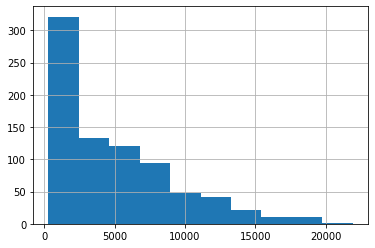

In [15]:
df['text_len'] = df['text'].str.len()
df['text_len'].hist(bins=10)

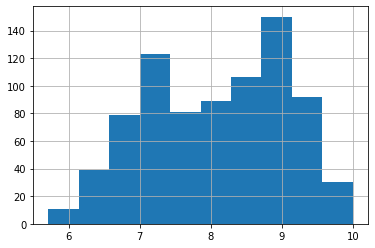

In [16]:
df['text_len_ln'] = np.log(df['text_len'])
df['text_len_ln'].hist(bins=10)

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](http://regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

| 번호 | 메타문자 | 메타문자 이름 | 의미 |
| --- | --- | --- | --- |
| 1 | ^ | Caret 캐릿 | 정규식의 시작을 의미 |
| 2 | $ | Dollar 달러 사인 | 정규식의 끝을 의미 |
| 3 | \[ \] | Bracket (Square brackets) 대괄호 | 문자셋 \[ \] 안에 있는 문자에 대해 확인 |
| 4 | ( ) | Parenthesis 소괄호 | 문자열을 확인 |
| 5 | ? | Question mark 물음표 | 물음표 다음에 0번 또는 1번 나오는 문자에 대해 확인 |
| 6 | + | Plus 더하기 | 물음표 다음에 1번 이상 나오는 문자에 대해 확인 |
| 7 | * | Multiply 곱하기(별) | 물음표 다음에 0번 이상 나오는 문자에 대해 확인 |
| 8 | . | Dot 점 | 줄바꿈 문자 \\n 제외한 모든문자 |
| 9 | \| | Pipe 파이프(작대기) | OR 연산 |
| 10 | \ | Escaping 백슬래쉬 | 특수문자를 일반문자로 고려하려할 때 |
| 11 | ! | Exclamation 느낌표 | NOT 연산 |
| 12 | \{ \} | Brace (Curly brackets) 중괄호 | 중괄호 안에 있는 문자에 대해 반복 |


| 번호 | 문자 | 의미 |
| --- | --- | --- |
| 1 | \d | 숫자 [0-9]와 동일한 표현 |
| 2 | \D | 숫자가 아닌 것 [^0-9]와 동일한 표현 |
| 3 | \s | 공백문자 [\t\n\r\f\v]와 동일한 표현 |
| 4 | \S | 공백문자가 아닌것 [^\t\n\r\f\v]와 동일한 표현 |
| 5 | \w | 문자+숫자 (alphanumeric), 언더스코어(_) [a-zA-Z0-9_]와 동일한 표현 |
| 6 | \W | 문자+숫자 (alphanumeric), 언더스코어(_)가 아닌것 [^a-zA-Z0-9_]와 동일한 표현 |


In [17]:
import re

docs = df[:5]['text']

# Extract words after 일부 위원은.
for doc in docs:    
    print(re.findall(r'일부 위원은 \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['일부 위원은 관련부서에서 ', '일부 위원은 세계 ', '일부 위원은 최근의 ', '일부 위원은 금년 ', '일부 위원은 관련부서에서 ', '일부 위원은 세계경제가 ']
['일부 위원은 그동안 ', '일부 위원은 그동안 ', '일부 위원은 중국의 ', '일부 위원은 금년 ', '일부 위원은 10월 ', '일부 위원은 금년 ']
['일부 위원은 현재 ', '일부 위원은 금년 ', '일부 위원은 저금리 ', '일부 위원은 경기의 ', '일부 위원은 MMF를 ']
['일부 위원은 최근 ', '일부 위원은 매크로 ', '일부 위원은 현재 ', '일부 위원은 가계부채 ', '일부 위원은 기존 ', '일부 위원은 기업부문 ']
['일부 위원은 최근 ', '일부 위원은 경기와 ', '일부 위원은 금번 ', '일부 위원은 기준금리를 ', '일부 위원은 금번 ', '일부 위원은 금번 ']


In [18]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[ㄱ-ㅎ|가-힣|a-z|A-Z|0-9|]+[-][ㄱ-ㅎ|가-힣|a-z|A-Z|0-9|]+', 
                     doc,            
                     re.IGNORECASE))  

[]
['Libor-OIS']
[]
[]
[]


In [19]:
# extract paranthized words
for i, doc in enumerate(docs):
    finder = re.finditer('\([^\)]+\)', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string


0 (127, 135) (Brexit)
0 (384, 391) (ASEAN)
0 (1160, 1163) (+)
0 (1276, 1279) (-)
0 (5801, 5809) (basket)
0 (6138, 6147) (ceiling)
1 (259, 291) (collateralized loan obligation)
1 (472, 491) (mezzanine tranche)
1 (2447, 2463) (data dependent)
1 (3687, 3694) (Hibor)
1 (3709, 3717) (Shibor)
1 (3876, 3879) (-)
1 (5779, 5784) (DXY)
1 (6018, 6023) (VIX)
1 (6894, 6899) (RTI)
2 (1612, 1625) (risk weight)
2 (1761, 1776) (downside risk)
2 (2978, 2991) (procyclical)
4 (6577, 6595) (search for yield)
4 (6613, 6625) (mispricing)


In [20]:
# economic uncertainty
pattern1 = r'(\b)불확실[ㄱ-ㅎ|가-힣]*'
pattern2 = r'(\b)경제[ㄱ-ㅎ|가-힣]*'
pattern3 = r'(\b)국회(\b)|(\b)적자(\b)|(\b)한국은행(\b)|(\b)입법(\b)|(\b)규제(\b)|(\b)청와대(\b)'

In [22]:
# extract uncertainty words
for pattern in [pattern1, pattern2, pattern3]:
    print(f'pattern = {pattern}')
    for i, doc in enumerate(docs):
        finder = re.finditer(pattern, doc)
        for m in finder: 
            print(i, m.span(),m.group()) # location (start,end) and matching string


pattern = (\b)불확실[ㄱ-ㅎ|가-힣]*
0 (424, 429) 불확실성이
0 (1301, 1306) 불확실성을
0 (1462, 1467) 불확실성이
0 (1575, 1580) 불확실성을
0 (4012, 4017) 불확실성이
0 (4883, 4888) 불확실성이
0 (4912, 4916) 불확실성
0 (6254, 6259) 불확실성이
0 (6409, 6414) 불확실성은
0 (6923, 6928) 불확실성에
0 (8384, 8388) 불확실성
0 (8617, 8622) 불확실성이
1 (2614, 2619) 불확실성은
2 (221, 226) 불확실성을
4 (169, 174) 불확실성이
4 (614, 619) 불확실성이
4 (733, 737) 불확실성
4 (780, 785) 불확실성이
4 (1474, 1479) 불확실성이
4 (3465, 3470) 불확실성이
4 (11115, 11120) 불확실성은
4 (13353, 13358) 불확실성이
pattern = (\b)경제[ㄱ-ㅎ|가-힣]*
0 (30, 34) 경제성장
0 (2262, 2264) 경제
0 (3209, 3212) 경제가
0 (3220, 3225) 경제전망의
0 (5009, 5013) 경제지표
0 (6244, 6247) 경제의
0 (6354, 6356) 경제
0 (6405, 6408) 경제의
0 (8136, 8139) 경제가
0 (8399, 8402) 경제적
0 (8602, 8604) 경제
1 (2023, 2026) 경제가
1 (2682, 2686) 경제에서
1 (3153, 3155) 경제
2 (170, 173) 경제의
2 (217, 220) 경제의
2 (243, 246) 경제에
2 (2397, 2401) 경제에의
3 (1180, 1185) 경제성장을
4 (147, 150) 경제의
4 (283, 286) 경제는
4 (3756, 3761) 경제동향을
4 (5451, 5456) 경제여건이
4 (5824, 5827) 경제에
4 (5871, 5874) 경제는
4 (6864, 6867) 경제의
4 (764

In [23]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [24]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

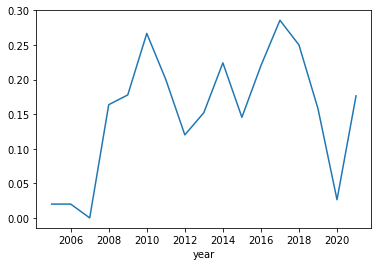

In [25]:
df.groupby('year')['uncertainty'].mean().plot()